In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import sklearn.model_selection as sk
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#7일치 데이터 보고
#8일째 close 예측하기
#1.MinMaxScalar
#2.train/test set
#3.regression 문제임 FC의 Loss=>NSE
#4.데이터 순서 뒤집어야함
data=pd.read_csv('C:/Users/student/Downloads/stock_daily.csv',header=1)


In [3]:
reverse_data=data.reindex(index=data.index[::-1])

In [4]:
seq_length = 7
data_dim = 5
hidden_dim = 10
output_dim = 1
learning_rate = 0.01


In [5]:
reverse_data.head()

,# Open,High,Low,Volume,Close
731,568.002570,568.002570,552.922516,13100,558.462551
730,561.202549,566.432590,558.672539,41200,559.992565
729,566.892592,567.002574,556.932537,10800,556.972503
728,558.712504,568.452595,558.712504,7900,567.162558
727,599.992707,604.832763,562.192568,147100,567.002574


In [6]:
scaler=MinMaxScaler()

In [7]:
scaler.fit(reverse_data)
pre_data=scaler.transform(data)

c:\users\student\anaconda3\envs\tensorflow2\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [8]:
x=pre_data
y=pre_data[:,[-1]]
dataX=[]
dataY=[]

In [9]:
for i in range(0, len(y)-seq_length):
    _x = x[i:i+seq_length]
    _y = y[i+seq_length]
    dataX.append(_x)
    dataY.append(_y)

In [10]:
X_train,X_test,y_train,y_test=sk.train_test_split(dataX,dataY,test_size=0.33,random_state=None,shuffle=False)

In [11]:
X = tf.placeholder(tf.float32, shape=[None, seq_length, data_dim])
Y = tf.placeholder(tf.float32, shape=[None,1])
cell = tf.contrib.rnn.BasicLSTMCell(num_units=hidden_dim, state_is_tuple=True, 
                                   activation=tf.tanh)

In [12]:
outputs, _states = tf.nn.dynamic_rnn(cell,X, dtype=tf.float32)
Y_pred = tf.contrib.layers.fully_connected(outputs[:,-1], output_dim, 
                                          activation_fn=None)
loss = tf.reduce_mean(tf.reduce_sum(tf.square(Y_pred-Y)))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
train = optimizer.minimize(loss)

target=tf.placeholder(tf.float32,[None,1])
prediction=tf.placeholder(tf.float32,[None,1])
rmse=tf.sqrt(tf.reduce_mean(tf.square(tf.subtract(target, prediction))))

In [13]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())
for step in range(2000):
    l,_ = sess.run([loss, train], feed_dict={X:dataX, Y:dataY})
    if step % 100 == 0:
        print ("step:",step,"loss:",l)

step: 0 loss: 126.473495
step: 100 loss: 0.78733814
step: 200 loss: 0.6231989
step: 300 loss: 0.51624894
step: 400 loss: 0.4381518
step: 500 loss: 0.38700244
step: 600 loss: 0.35041058
step: 700 loss: 0.32285333
step: 800 loss: 0.30332613
step: 900 loss: 0.289932
step: 1000 loss: 0.2802408
step: 1100 loss: 0.27237394
step: 1200 loss: 0.2653231
step: 1300 loss: 0.25868237
step: 1400 loss: 0.25232562
step: 1500 loss: 0.24622117
step: 1600 loss: 0.24035743
step: 1700 loss: 0.23473118
step: 1800 loss: 0.22934651
step: 1900 loss: 0.2245861


In [14]:
test_prediction=sess.run(Y_pred,feed_dict={X:X_test})
print('MSE',sess.run(rmse,feed_dict={target:y_test,prediction:test_prediction}))

MSE 0.011061584


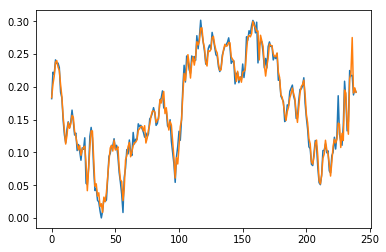

In [15]:
plt.plot(y_test)
plt.plot(test_prediction)